In [88]:
# DATA PREPROCESSING REGRESSORS
# REGRESSOR: Area agricola (TODO)
# REGRESSOR: Temepratura
# REGRESSOR: Temepratura (Risoluzione bassa)
# REGRESSOR: Altitudine
# REGRESSOR: Aree in classi con popolazione (Altro files) (TODO)

<AxesSubplot:>

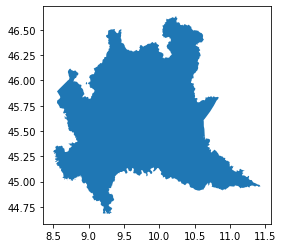

In [90]:
# REGIONE
import geopandas as gpd
from shapely.geometry import Point

from shapely import speedups
speedups.disable()

regione = gpd.read_file('../resources/regione/regione_2015.shp')

regione.to_crs(epsg=4326, inplace=True)
regione.plot()

In [166]:
# AMMONIACA
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds_ammoniaca = xr.load_dataset('../datasets/ammoniaca.nc')

ds_ammoniaca

<xarray.Dataset>
Dimensions:                        (lat: 19, lon: 28, time: 252)
Coordinates:
  * time                           (time) datetime64[ns] 2000-01-15 ... 2020-...
  * lat                            (lat) float64 44.75 44.85 ... 46.45 46.55
  * lon                            (lon) float64 8.55 8.65 8.75 ... 11.15 11.25
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 nan nan ... nan nan

In [91]:
# REGRESSOR: Area agricola (TODO)

<AxesSubplot:>

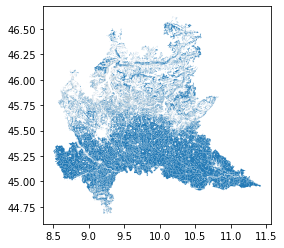

In [92]:
import geopandas as gpd

shp_area_agricola = gpd.read_file('../resources/area_agricola/area_agricola.shp') # Regione Lombardia (shp)

shp_area_agricola.to_crs(epsg=4326, inplace=True)
shp_area_agricola.plot()

In [93]:
shp_area_agricola

,WIZ_U32WG_,ARTICOLO,ISTAT,NOME,SHAPE_AREA,SHAPE_LEN,geometry
0,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,101881.519006,1862.551898,"POLYGON ((8.81300 45.59631, 8.81337 45.59629, ..."
1,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,167998.890282,2528.378404,"POLYGON ((8.86461 45.59897, 8.86543 45.59757, ..."
2,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,2034.709113,195.049164,"POLYGON ((8.87126 45.59848, 8.87090 45.59838, ..."
3,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,866.924122,198.920701,"POLYGON ((8.87163 45.59851, 8.87160 45.59850, ..."
4,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,5017.668598,423.272446,"POLYGON ((8.80845 45.59900, 8.80847 45.59833, ..."
...,...,...,...,...,...,...,...
61633,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,4022.035409,396.439808,"POLYGON ((9.36742 46.11273, 9.36752 46.11255, ..."
61634,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,19835.572116,1004.305746,"POLYGON ((9.31865 46.11253, 9.31898 46.11247, ..."
61635,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,1205.258657,145.396328,"POLYGON ((9.31746 46.11307, 9.31740 46.11274, ..."
61636,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,2575.256482,317.882663,"POLYGON ((9.36905 46.11227, 9.36880 46.11199, ..."


In [94]:
shp_area_agricola.shape

(61638, 7)

In [96]:
# REGRESSOR: Temepratura

In [149]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds_temperature = xr.load_dataset('../datasets/temperature.nc') # Copernicus (0.1°x0.1°)

ds_temperature

<xarray.Dataset>
Dimensions:    (latitude: 31, longitude: 41, time: 248)
Coordinates:
  * longitude  (longitude) float32 8.0 8.1 8.2 8.3 8.4 ... 11.7 11.8 11.9 12.0
  * latitude   (latitude) float32 47.0 46.9 46.8 46.7 ... 44.3 44.2 44.1 44.0
  * time       (time) datetime64[ns] 2000-01-15T12:00:00 ... 2020-08-15T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 272.27014 ... 301.16037
    lai_hv     (time, latitude, longitude) float32 1.1997437 ... 2.4999995
    lai_lv     (time, latitude, longitude) float32 2.2058244 ... 2.4267623
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-03 14:55:57 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [153]:
lat_bounds = slice(46.65,44.75) # Invertiti
lon_bounds = slice(8.5, 11.25)

t2m = ds_temperature.t2m.sel(latitude=lat_bounds, longitude=lon_bounds)
lai_hv = ds_temperature.lai_hv.sel(latitude=lat_bounds, longitude=lon_bounds)
lai_lv = ds_temperature.lai_lv.sel(latitude=lat_bounds, longitude=lon_bounds)

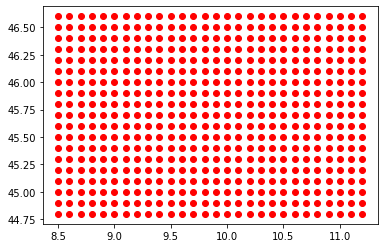

In [154]:
lats = t2m.latitude
lons = t2m.longitude

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

plt.scatter(lons, lats, c='r')

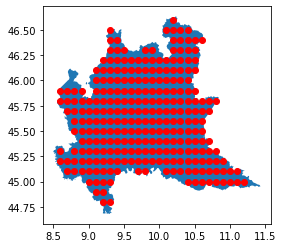

In [155]:
grid = [ (round(lat, 2), round(lon, 2)) for lat, lon in zip(lats, lons) if regione.geometry.contains(Point(lon, lat)).bool()]

lats = [coord[0] for coord in grid]
lons = [coord[1] for coord in grid]

regione.plot()
plt.scatter(lons, lats, c='r')

plt.show()

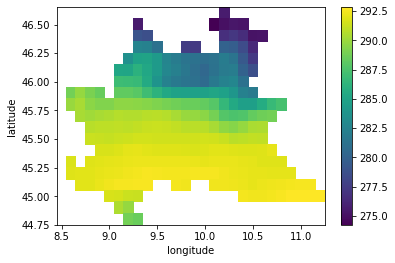

In [156]:
t2m_lats = [round(lat, 2) for lat in t2m.latitude.to_series().tolist()]
t2m_lons = [round(lon, 2) for lon in t2m.longitude.to_series().tolist()]

data = np.zeros((len(t2m_lats), len(t2m_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(t2m_lats):
    for lon_idx, lon in enumerate(t2m_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(t2m[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_t2m = xr.DataArray(data, coords=[t2m_lats, t2m_lons], dims=['latitude', 'longitude'])
mean_t2m.plot()

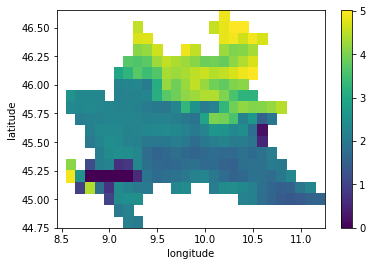

In [158]:
lai_hv_lats = [round(lat, 2) for lat in lai_hv.latitude.to_series().tolist()]
lai_hv_lons = [round(lon, 2) for lon in lai_hv.longitude.to_series().tolist()]

data = np.zeros((len(lai_hv_lats), len(lai_hv_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(lai_hv_lats):
    for lon_idx, lon in enumerate(lai_hv_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(lai_hv[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_lai_hv = xr.DataArray(data, coords=[lai_hv_lats, lai_hv_lons], dims=['latitude', 'longitude'])
mean_lai_hv.plot()

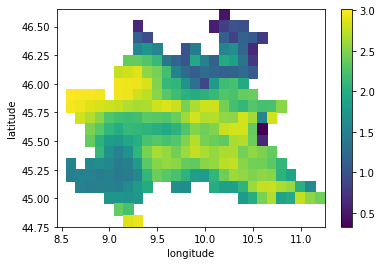

In [161]:
lai_lv_lats = [round(lat, 2) for lat in lai_lv.latitude.to_series().tolist()]
lai_lv_lons = [round(lon, 2) for lon in lai_lv.longitude.to_series().tolist()]

data = np.zeros((len(lai_lv_lats), len(lai_lv_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(lai_lv_lats):
    for lon_idx, lon in enumerate(lai_lv_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(lai_lv[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_lai_lv = xr.DataArray(data, coords=[lai_lv_lats, lai_lv_lons], dims=['latitude', 'longitude'])
mean_lai_lv.plot()

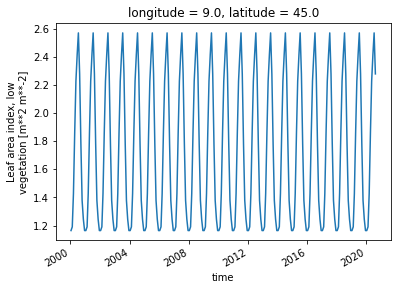

In [179]:
lai_lv_ts = lai_lv[:,16,5]

lai_lv_ts.plot()

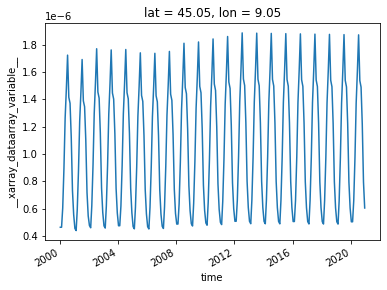

In [180]:
ammoniaca_ts = ds_ammoniaca.__xarray_dataarray_variable__[:,3,5]

ammoniaca_ts.plot()

In [181]:
import pandas as pd

s1 = pd.Series(ammoniaca_ts.values.tolist())
s2 = pd.Series(lai_lv_ts.values.tolist())

s1.corr(s2, method='pearson')

0.9038009281976336

In [98]:
# REGRESSOR: Temepratura (Risoluzione bassa)

In [136]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds_temperature_low_resolution = xr.load_dataset('../datasets/temperature_low_resolution.nc') # Copernicus (0.75°x0.75°)

ds_temperature

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 204)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2019-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 247.31548 ... 246.61078
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-22 12:18:30 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [137]:
lat_bounds = slice(46.65,44.75) # Invertiti
lon_bounds = slice(8.5, 11.25)

t2m = ds_temperature_low_resolution.t2m.sel(latitude=lat_bounds, longitude=lon_bounds)

t2m

<xarray.DataArray 't2m' (time: 204, latitude: 3, longitude: 4)>
array([[[267.25284, 266.30984, 264.9379 , 266.4324 ],
        [273.8572 , 274.26572, 273.11337, 273.9304 ],
        [276.9381 , 275.85382, 275.4572 , 276.0002 ]],

       [[265.20343, 264.58215, 263.39233, 265.59494],
        [272.62994, 273.5372 , 271.91675, 272.10568],
        [275.79086, 274.887  , 274.65042, 275.2836 ]],

       [[274.58914, 273.01123, 271.52866, 273.63422],
        [280.28796, 280.58923, 278.94666, 279.78583],
        [283.248  , 282.70502, 282.32373, 282.3833 ]],

       ...,

       [[280.34412, 279.699  , 278.73218, 279.88794],
        [285.5408 , 285.96463, 284.2795 , 285.5391 ],
        [289.22598, 288.67108, 288.19446, 289.1579 ]],

       [[272.85803, 272.38654, 271.35162, 273.12698],
        [278.7424 , 279.65305, 277.9509 , 279.68027],
        [282.67438, 282.56033, 282.49905, 283.69226]],

       [[270.97205, 270.0614 , 268.7899 , 269.69882],
        [276.7577 , 277.2632 , 275.30234, 276.50916],
        [279.84708, 279.09473, 278.52792, 279.11685]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 9.0 9.75 10.5 11.25
  * latitude   (latitude) float32 46.5 45.75 45.0
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2019-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

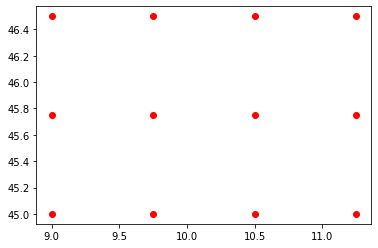

In [138]:
lats = t2m.latitude
lons = t2m.longitude

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

plt.scatter(lons, lats, c='r')

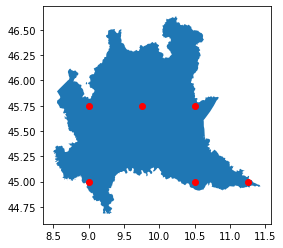

In [139]:
grid = [ (round(lat, 2), round(lon, 2)) for lat, lon in zip(lats, lons) if regione.geometry.contains(Point(lon, lat)).bool()]

lats = [coord[0] for coord in grid]
lons = [coord[1] for coord in grid]

regione.plot()
plt.scatter(lons, lats, c='r')

plt.show()

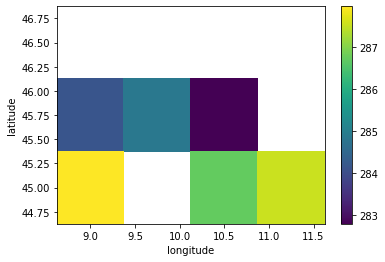

In [140]:
t2m_lats = [round(lat, 2) for lat in t2m.latitude.to_series().tolist()]
t2m_lons = [round(lon, 2) for lon in t2m.longitude.to_series().tolist()]

data = np.zeros((len(t2m_lats), len(t2m_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(t2m_lats):
    for lon_idx, lon in enumerate(t2m_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = np.mean(t2m[:12, lat_idx, lon_idx].to_series().tolist())
            
mean_t2m = xr.DataArray(data, coords=[t2m_lats, t2m_lons], dims=['latitude', 'longitude'])
mean_t2m.plot()

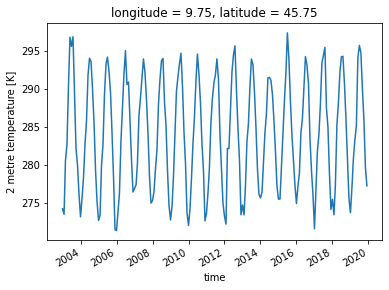

In [141]:
t2m[:,1,1].plot()

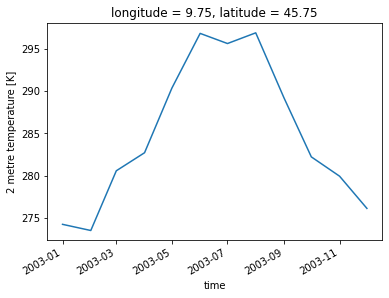

In [142]:
t2m[:12,1,1].plot()

In [143]:
# REGRESSOR: Altitudine

In [144]:
ds_elevation = xr.load_dataset('..\\datasets\\elevation.nc') # E-OBS (0.1°x0.1°)

ds_elevation

<xarray.Dataset>
Dimensions:    (latitude: 465, longitude: 705)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
Data variables:
    elevation  (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    References:     http://surfobs.climate.copernicus.eu//dataaccess/access_e...
    E-OBS_version:  21.0e
    Conventions:    CF-1.4

In [145]:
lat_bounds = slice(44.75,46.65)
lon_bounds = slice(8.5, 11.25)

elevation = ds_elevation.elevation.sel(latitude=lat_bounds, longitude=lon_bounds)

elevation

<xarray.DataArray 'elevation' (latitude: 19, longitude: 28)>
array([[  98.19444  ,   94.72222  ,  116.43056  ,  153.88889  ,
         247.15277  ,  355.14584  ,  499.1111   ,  658.3958   ,
         668.9861   ,  470.38196  ,  392.2639   ,  339.90277  ,
         272.34723  ,  202.26389  ,  150.93056  ,   93.798615 ,
          56.354168 ,   36.65972  ,   28.180555 ,   22.625    ,
          16.222221 ,   12.284722 ,   13.111111 ,   11.277778 ,
          11.069445 ,    8.034722 ,    6.       ,    5.9652777],
       [ 108.423615 ,  111.40972  ,   71.9375   ,   82.263885 ,
         104.25694  ,  206.75694  ,  284.46527  ,  357.93054  ,
         352.38196  ,  245.79861  ,  170.63194  ,  117.263885 ,
          89.99306  ,   66.5625   ,   47.854168 ,   31.972221 ,
          26.083334 ,   23.868055 ,   21.743055 ,   16.555555 ,
          12.875    ,   11.       ,   11.       ,   11.       ,
          11.       ,    6.4791665,    5.826389 ,    6.9305553],
       [ 110.47222  ,   83.923615 ,   73.520836 ,   68.770836 ,
          65.458336 ,   68.84722  ,   93.86806  ,  138.10417  ,
         123.451385 ,   74.72222  ,   57.868057 ,   49.13889  ,
          42.11111  ,   34.125    ,   30.82639  ,   26.95139  ,
          24.472221 ,   21.5      ,   20.76389  ,   17.95139  ,
          14.166667 ,   12.895833 ,   11.541667 ,   11.       ,
...
        2012.0209   , 2282.2708   , 2499.5068   , 2280.0278   ,
        2278.6528   , 2406.2986   , 2484.0278   , 2484.514    ,
        2536.5693   , 2259.1943   , 1800.5625   , 2281.9514   ,
        2775.4167   , 2815.7014   , 2526.2014   , 2083.4514   ,
        1823.6041   , 1231.625    , 1249.3889   ,  623.19446  ],
       [2096.014    , 2000.7986   , 2181.764    , 2122.6318   ,
        1787.257    , 2523.2083   , 2229.139    , 2205.9583   ,
        2108.7014   , 2041.5764   , 2176.6182   , 2154.514    ,
        2564.639    , 2224.7568   , 2339.875    , 2535.764    ,
        2240.7568   , 2342.8193   , 2349.75     , 2481.3333   ,
        2188.2153   , 2594.389    , 2159.5486   , 2169.0557   ,
        1937.882    , 1544.6597   , 1007.5278   ,  809.49304  ],
       [1895.7986   , 2265.7153   , 2067.2847   , 1966.5764   ,
        2237.4722   , 2159.889    , 1747.4375   , 2086.0625   ,
        1995.2014   , 1533.8472   , 1511.1459   , 1801.7361   ,
        2030.3959   , 2576.139    , 2402.4722   , 2185.3818   ,
        2168.0068   , 2334.7917   , 2277.0693   , 1925.6736   ,
        1358.4445   , 1724.0903   , 1773.0347   , 1805.9445   ,
        1394.5764   , 1277.9097   ,  547.2778   , 1614.3125   ]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 8.55 8.65 8.75 8.85 ... 11.05 11.15 11.25
  * latitude   (latitude) float64 44.85 44.95 45.05 45.15 ... 46.45 46.55 46.65
Attributes:
    units:      metres
    long_name:  Elevation

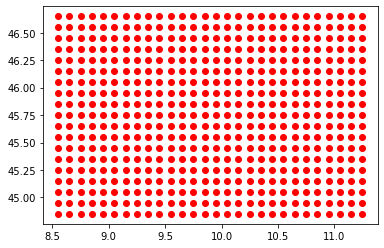

In [146]:
lats = elevation.latitude
lons = elevation.longitude

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

plt.scatter(lons, lats, c='r')

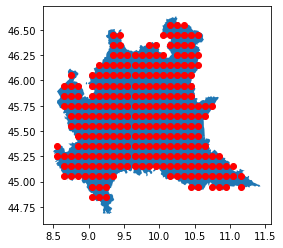

In [147]:
grid = [ (round(lat, 2), round(lon, 2)) for lat, lon in zip(lats, lons) if regione.geometry.contains(Point(lon, lat)).bool()]

lats = [coord[0] for coord in grid]
lons = [coord[1] for coord in grid]

regione.plot()
plt.scatter(lons, lats, c='r')

plt.show()

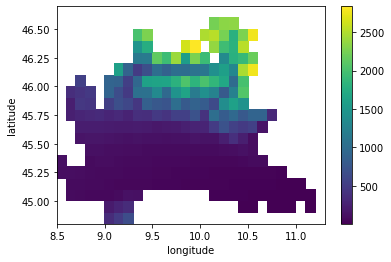

In [148]:
elevation_lats = [round(lat, 2) for lat in elevation.latitude.to_series().tolist()]
elevation_lons = [round(lon, 2) for lon in elevation.longitude.to_series().tolist()]

data = np.zeros((len(elevation_lats), len(elevation_lons)))
data.fill(np.nan)

for lat_idx, lat in enumerate(elevation_lats):
    for lon_idx, lon in enumerate(elevation_lons):
        if (lat, lon) in grid:
            data[lat_idx][lon_idx] = elevation[lat_idx, lon_idx]
            
mean_elevation = xr.DataArray(data, coords=[elevation_lats, elevation_lons], dims=['latitude', 'longitude'])
mean_elevation.plot()